# **MT 1 Explain White Patch Retinex and Color Temperature Adjustment (steps of the process would be enough, add it in the notebook)**

* ## **White Patch Retinex Explanation:**

The White Patch Retinex method assumes that the brightest pixel in an image should be pure white. It normalizes all colors based on the maximum intensity found in the image to correct color casts.

**Steps for White Patch Retinex:**

1. Convert Image to Float:
Convert the image to float32 format to avoid rounding errors when applying scaling.

2. Find Maximum Intensity per Channel:
Compute the maximum pixel value in each channel (Red, Green, and Blue).
This helps find the brightest pixel in the image.

3. Compute Scaling Factors:
Determine how much each channel needs to be scaled to make the brightest pixel white (255,255,255).
Scaling Factor = 255 / Maximum Value per Channel

4. Apply Scaling to the Image:
Multiply each pixel by its channel-specific scaling factor.

5. Clip and Convert Back:
Some pixel values may exceed 255 due to multiplication, so they are clipped to [0, 255]. Convert the image back to uint8 format for display.


* ## **Color Temperature Adjustment Explanation:**

Color Temperature Adjustment modifies the warmth or coolness of an image by increasing or decreasing the red and blue color channels.

**Steps for Color Temperature Adjustment:**

1. Convert Image to Float:
Convert the image to float32 to avoid precision errors.
Create an Adjustment Factor

2. Define a temperature shift value (adjustment):
 * Positive values → Warmer (more red, less blue)
 * Negative values → Cooler (more blue, less red)
 * The Green channel remains mostly unchanged.

3. Apply the Adjustment:
Add or subtract the adjustment value to the respective color channels.

4. Clip and Convert Back:
Ensure pixel values stay within [0, 255].
Convert the image back to uint8 format

# **MT 2 Implement both method with python and apply on an image**

In [44]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# **White Balance**

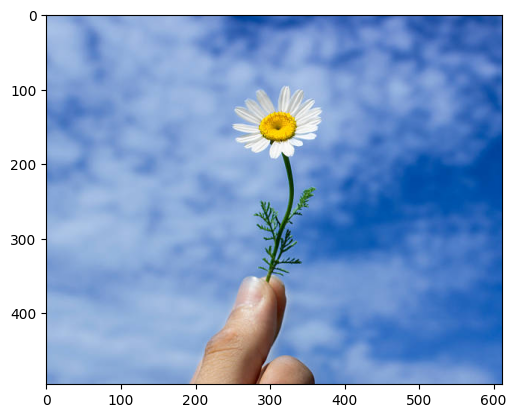

In [45]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/flowerr.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## **White Patch Retinex**

Max color per channel: [255. 255. 255.]
Scaling factors:  [1. 1. 1.]


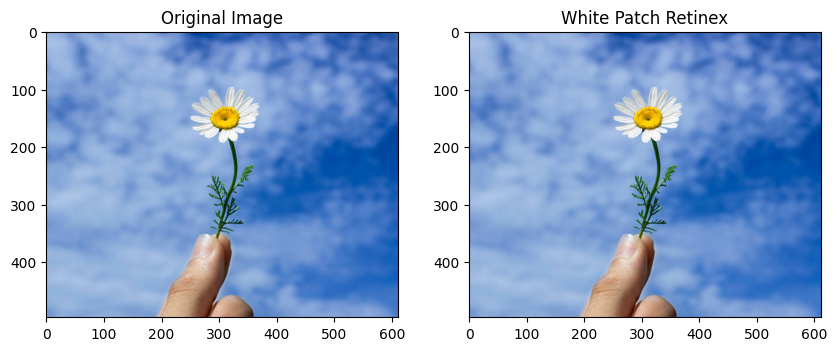

In [46]:
def white_patch_retinex(img):
    img_float = img.astype(np.float32)  # Converting to float32 to avoid rounding errors

    # Finding the maximum intensity for each channel (R, G, B)
    max_color = np.max(img_float, axis=(0, 1))
    print("Max color per channel:", max_color)

    # Computing the scaling factor to meet the brightest pixel in each channel.
    scale = 255.0 / max_color
    print("Scaling factors: ", scale)

    # Appling the scaling factor to the image
    img_balanced = img_float * scale

    # Clipping values to [0,255] and converting back to uint8
    img_balanced = np.clip(img_balanced, 0, 255).astype(np.uint8)

    return img_balanced


balanced_image_WPR = white_patch_retinex(img)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(balanced_image_WPR)
plt.title("White Patch Retinex")

plt.show()

## **Color Temperature Adjustment**

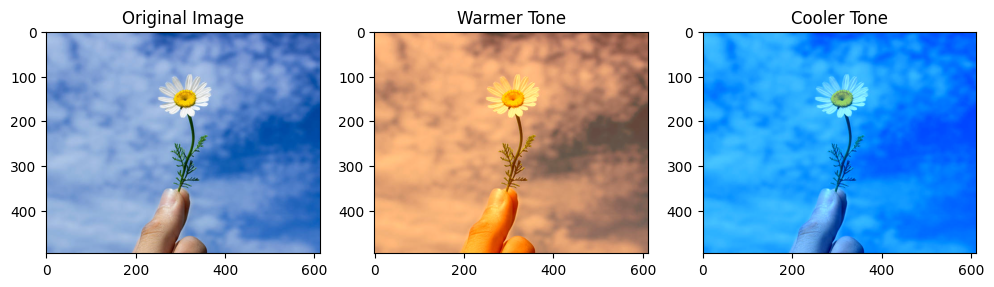

In [47]:
def adjust_color_temperature(img, adjustment):
    img_float = img.astype(np.float32)  # Converting to float32

    # Creating a temperature adjustment array
    temp_adjustment = np.array([adjustment, 0, -adjustment], dtype=np.float32)

    # Applying temperature adjustment to the float image
    img_temp = img_float + temp_adjustment

    # Clipping values and convert back to uint8
    img_temp = np.clip(img_temp, 0, 255).astype(np.uint8)

    return img_temp


# Warmer: Increase red, decrease blue
# Cooler: Increase blue, decrease red

warmer_image = adjust_color_temperature(img, adjustment=100)
cooler_image = adjust_color_temperature(img, adjustment=-100)

# positive adjustment value will add to the red pixels and subtract from blue pixels, as a result it turns into warmer image
# negative adjustment value will subtract from red pixels and add to blue pixels making the image cooler.

# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(warmer_image)
plt.title("Warmer Tone")

plt.subplot(1, 3, 3)
plt.imshow(cooler_image)
plt.title("Cooler Tone")

plt.show()

## **Gray World Assumption**

For sf value:  50
average color [111.37788 147.21904 200.8732 ]
scaling factor [0.4489222  0.33962998 0.24891324]
max and min value 114.47516 0.0


For sf value:  128
average color [111.37788 147.21904 200.8732 ]
scaling factor [1.1492409 0.8694528 0.6372179]
max and min value 293.05643 0.0


For sf value:  200
average color [111.37788 147.21904 200.8732 ]
scaling factor [1.7956887 1.3585199 0.995653 ]
max and min value 457.90063 0.0




Text(0.5, 1.0, 'Scaling factor 200')

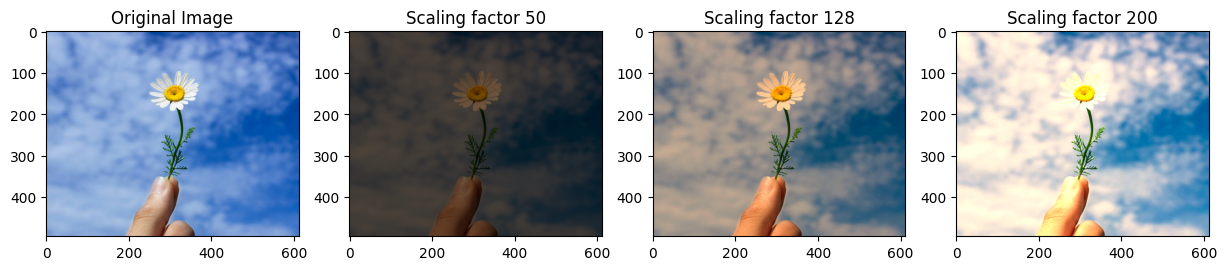

In [48]:
def white_balance(img, sf=128):
  #converting the image into float32, so that rounding error doesnot occur while multiplying by scaling factors.
  img_float = img.astype(np.float32)
  print("For sf value: ",sf)
  #calculating the average color of the image. each channel avg intensity is being calculated. so that we can know how much scale will be needed to meet sf=128
  avg_color = np.mean(img_float, axis=(0,1)) #it calculates across the height and width for each channel
  print('average color', avg_color)

  #calculating the scaling factors. this factors will be multiplied with the corresponding channel each pixel
  scale = sf / avg_color # avg_color intensity will be needed in order to meet sf , so for 1 pixel we need sf/avg_color
  print('scaling factor', scale)

  #applying the scaling factors to each channel in order to meet sf=128
  img_balanced = img_float * scale
  print('max and min value', np.max(img_balanced), np.min(img_balanced))
  print("\n")
  #clip the values to be in the valid range [0, 255], due to multiplication any pixel can exceed 255. already max value 293 found.
  img_balanced = np.clip(img_balanced, 0, 255).astype(np.uint8) #as images are normally in 8 bit unsigned integer so float32 is converted into uint8

  return img_balanced

balanced_image1 = white_balance(img, sf=50)
balanced_image2 = white_balance(img)
balanced_image3 = white_balance(img, sf=200)

plt.figure(figsize=(15,8))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(balanced_image1)
plt.title("Scaling factor 50")

plt.subplot(1, 4, 3)
plt.imshow(balanced_image2)
plt.title("Scaling factor 128")

plt.subplot(1, 4, 4)
plt.imshow(balanced_image3)
plt.title("Scaling factor 200")


# **OT  Explain Prewitt Operator, Scharr Operator (steps of the process would be enough)**

## **Prewitt Operator**  

The Prewitt operator is a simple edge detection filter that approximates the gradient of an image using two 3×3 convolution kernels.

**Steps:**

1. Convert Image to Grayscale:
If the image is in RGB, convert it to grayscale since edge detection works on intensity differences.

2. Apply Convolution with Prewitt Kernels:
 * Use two 3×3 kernels to compute gradients:

 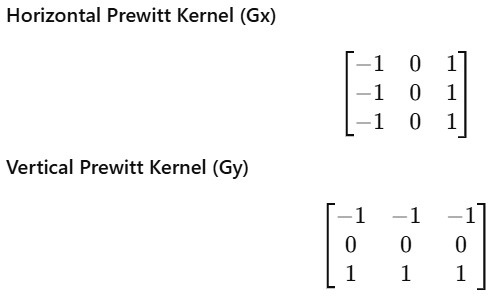

3. Combine both the result of Gx and Gy

## **Scharr Operator**

The Scharr operator is a more precise edge detector than Prewitt and Sobel, designed to handle diagonal edges and reduce noise sensitivity.

**Steps:**

1. Convert Image to Grayscale:
Convert to grayscale for intensity-based processing.

2. Apply Convolution with Scharr Kernels:

 * Uses a modified kernel to improve accuracy:

 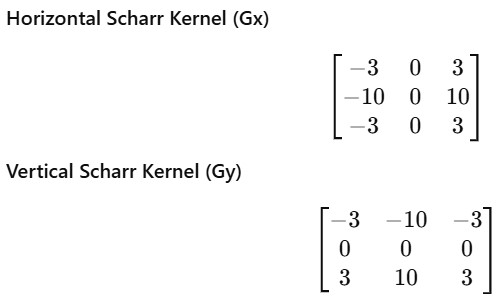

3. Combine the both result of Gx and Gy

Text(0.5, 1.0, 'Scharr Edge Detection')

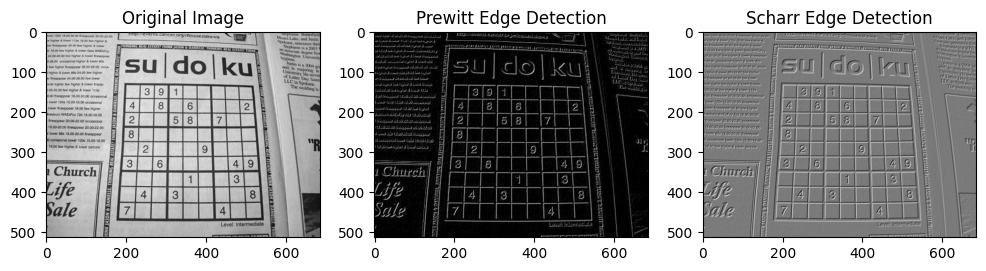

In [49]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/sudoku.png", cv2.IMREAD_GRAYSCALE)

prewitt_x = cv2.filter2D(img, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(img, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharr = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')

plt.subplot(1, 3, 3)
plt.imshow(scharr, cmap='gray')
plt.title('Scharr Edge Detection')

# **More Optional Tasks**

# **Canny Edge Detection Filter**

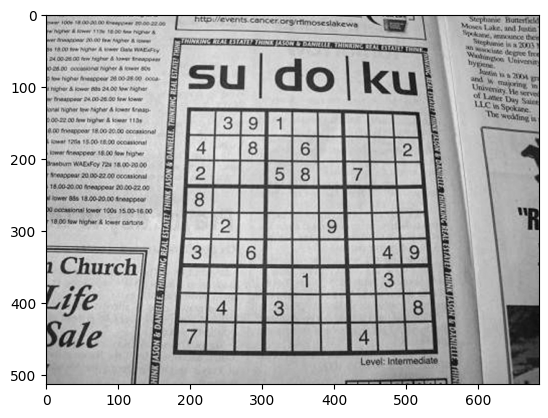

In [50]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/sudoku.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, 'gray')

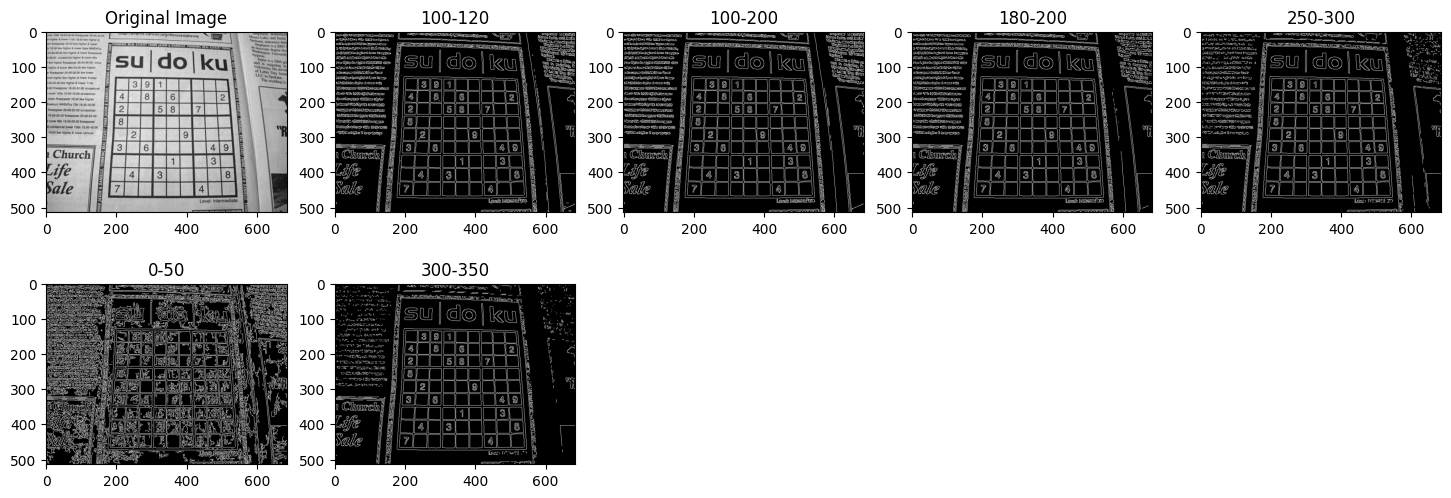

In [51]:
lower_threshold = 100
upper_threshold = 200

#here we comparing the thresholds with intensity gradients not intensity values

edges1 = cv2.Canny(image, 100, 120) #even less intensity edges will be counted as edges. means noise will be shown.
edges2 = cv2.Canny(image, lower_threshold, upper_threshold) #somewhat better than the previous, noise will be removed.
edges3 = cv2.Canny(image, 180, 200) # image will be more smoothed than previous.
edges4 = cv2.Canny(image, 250, 300) #edges will be thinned, as less pixels will be considered as sure edges
edges5 = cv2.Canny(image, 0, 50) #each pixel will be counted
edges6 = cv2.Canny(image, 300, 350) #edges will be more thinned. and weak edges will be lost somewhat.

plt.figure(figsize=(18,12))

plt.subplot(1,5,1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1,5,2)
plt.imshow(edges1, "gray")
plt.title("100-120")

plt.subplot(1,5,3)
plt.imshow(edges2, "gray")
plt.title("100-200")

plt.subplot(1,5,4)
plt.imshow(edges3, "gray")
plt.title("180-200")

plt.subplot(1,5,5)
plt.imshow(edges4, "gray")
plt.title("250-300")

plt.subplot(2,5,6)
plt.imshow(edges5, "gray")
plt.title("0-50")

plt.subplot(2,5,7)
plt.imshow(edges6, "gray")
plt.title("300-350")


plt.show()

In [52]:
img.shape

x , y = img.shape[:2]
print("height: ", x, "width: ", y)
print(img.shape)

height:  514 width:  685
(514, 685)


In [53]:
avg_color = np.mean(img, axis=(0,1))
print("Average color", avg_color)

Average color 169.17359481950638


In [54]:
max_color = np.max(balanced_image2, axis=(0, 1))
print("Max color per channel:", max_color)

Max color per channel: [255 221 162]
